In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
class LinearRegression:
    """
    Linear regression model.
    Polynomial func: y = w0 + w1*x + w2*x^2 + w3*x^3 +.... 
    """
    def __init__(self, degree=1):
        self._k = degree
    
    def create_poly(self, X):
        """
        Generates a polynomial feature map using the data x.
        The polynomial map should have powers from 0 to k
        Output should be a numpy array whose shape is (n_examples, k+1)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """        
        fmap = np.empty([X.shape[0], self._k + 1])
        for i in range(self._k + 1):
            fmap[:, i] = X[:, 1] ** i
        return fmap
    
    def transform(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        self._X = np.hstack((np.ones((X.shape[0], 1)), X))
        self._X = self.create_poly(self._X)
        
        self._y = np.array(y).reshape(-1, 1)
    
    def fit(self, X, y):
        """
        w* = argmin ||y - Xw||^2_2
        """
        self.transform(X, y)
        self._W = np.linalg.solve(self._X.T.dot(self._X), self._X.T.dot(self._y))
        
    def ridge_fit(self, X, y, alpha=1.0):
        """
        Ridge regression:
        w* = argmin ||y - Xw||^2_2 + alpha * ||w||^2_2
        """
        self.transform(X, y)
        self._alpha = alpha
        eye = np.eye(self._X.shape[1])
        self._W = np.linalg.solve(self._X.T.dot(self._X) + self._alpha * eye, self._X.T.dot(self._y))
        
    def lasso_fit(self, X, y, alpha=1.0, learning_rate=0.01, max_ite=1000):
        """
        Lasso regression:
        w* = argmin ||y - Xw||^2_2 + alpha * ||w||_1
        
        Args::
            learnining_rate: update W
            ite: Number of iterations to update W
        """
        self._alpha = alpha
        self._lrate = learning_rate
        self.transform(X, y)
        self._W = np.zeros(self._X.shape[1])
        for i in range(max_ite):
            self.update_w()
    
    def update_w(self):
        """Update W in Lasso reg"""
        y_pred = np.matmul(self._X, self._W).reshape(-1, 1)
        # Calculate gradients:
        dW = np.zeros(self._X.shape[1])
        for j in range(self._X.shape[1]):
            if self._W[j] > 0:
                dW[j] = (-2 * (self._X[:, j]).dot(self._y - y_pred) + self._alpha) / self._X.shape[0]
            else:
                dW[j] = (-2 * (self._X[:, j]).dot(self._y - y_pred) - self._alpha) / self._X.shape[0]
        # update W
        self._W -= self._lrate * dW
                
    def coef(self):
        """Return the coeficients"""
        return self._W
    
    def predict(self, x_new):
        if x_new.ndim == 1:
            x_new = x_new.reshape(-1, 1)
        x_new = np.hstack((np.ones((x_new.shape[0], 1)), x_new))
        x_new = self.create_poly(x_new)
        return np.matmul(x_new, self._W)

## Ex1.
Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [43]:
data = pd.read_csv('data_square.csv')
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


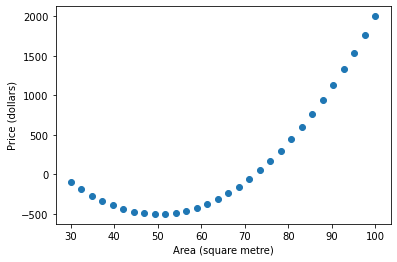

In [44]:
data = data.to_numpy()
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel('Area (square metre)')
plt.ylabel('Price (dollars)')
plt.show()

In [45]:
model = LinearRegression(2)
model.fit(X, y)

In [46]:
model.coef()

array([[ 2.00000579e+03],
       [-1.00000222e+02],
       [ 1.00000199e+00]])

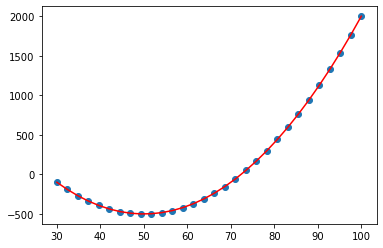

In [47]:
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='r')

## Ex2.
Tự sinh dữ liệu như ở hình dưới:
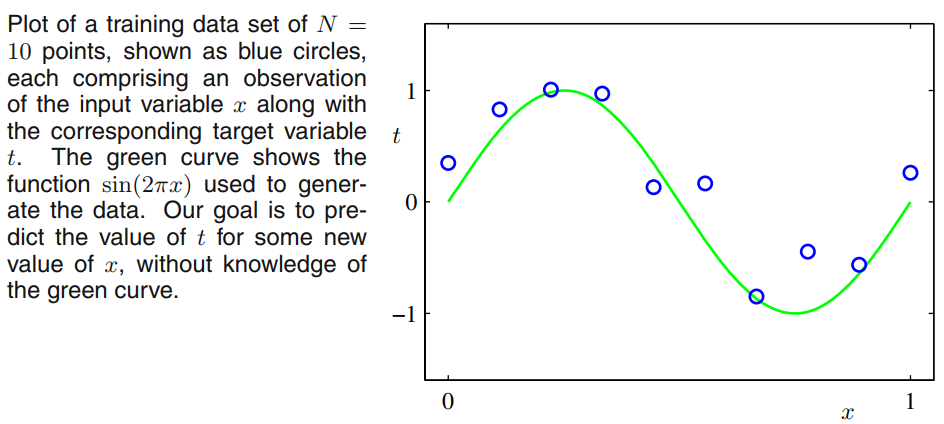

### 1. fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình

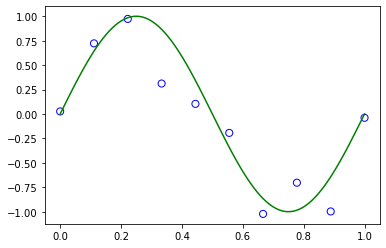

In [48]:
def create_data(func, size, std):
    x = np.linspace(0, 1, size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.show()

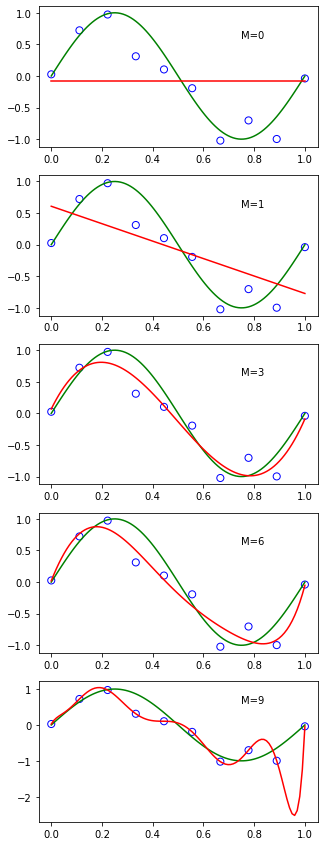

In [53]:
fig, ax = plt.subplots(5, 1, figsize = (5, 15))

for i, k in enumerate([0, 1, 3, 6, 9]):
    m = LinearRegression(k)
    m.fit(x_train, y_train)
    
    y_pred = m.predict(x_test)
    
    ax[i].scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
    ax[i].plot(x_test, y_test, c="g")
    ax[i].plot(x_test, y_pred, c="r")
    ax[i].annotate("M={}".format(k), xy=(0.75, 0.6))
    
plt.show()

1. M = 0: mô hình là một đường thẳng song song với Ox, fit được rất ít điểm, mô hình bị underfitting

2. M = 1: mô hình là một đường thẳng có dạng y = ax + b, fit được nhiều điểm hơn so với M = 0, tuy nhiên loss vẫn cao --> underfitting

3. M = 3: mô hình có dạng đa thức bậc 3, khá trùng khớp với đường sin(2pi*x) --> ok

4. M = 6: mô hình có dạng đa thức bậc cao nhất là 6, hầu như fit với các điểm dữ liệu, ok, gần overfitting

5. M = 9: mô hình dạng đa thức bậc 9, fit hoàn toàn với các điểm dữ liệu, --> overfitting

==> các trường hợp underfitting và overfitting với M = 0, 1, 9, khi dự đoán hoặc thêm các điểm mới, mô hình cho sai số lớn

==> M = 3 và M = 6 là các trường hợp ok hơn, loss thấp, và khi thêm dữ liệu mới có thể cho kết quả khả quan. Tuy nhiên, nếu 2 mô hình có loss tương đồng thì nên chọn mô hình đơn giản hơn

==> nên chọn M = 3

### 2. thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

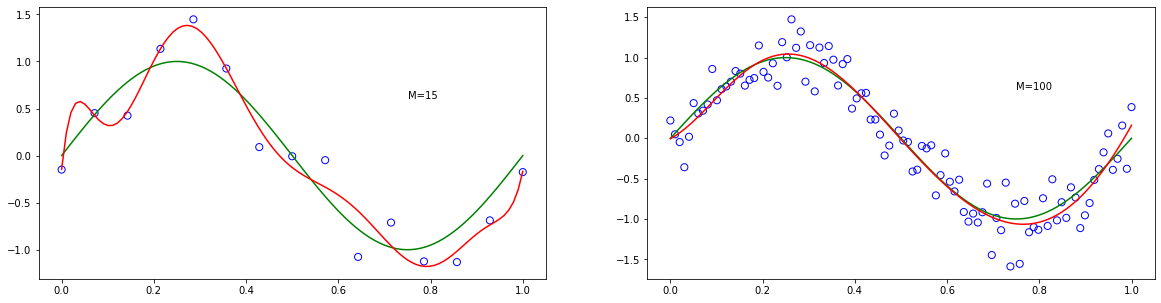

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

for i, size in enumerate([15, 100]):
    x_train2, y_train2 = create_data(func, size, 0.25)
    m2 = LinearRegression(9)
    m2.fit(x_train2, y_train2)
    
    y_pred2 = m2.predict(x_test)
    
    ax[i].scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50)
    ax[i].plot(x_test, y_test, c="g")
    ax[i].plot(x_test, y_pred2, c="r")
    ax[i].annotate("M={}".format(size), xy=(0.75, 0.6))
    
plt.show()

Khi tăng tập mẫu lên 15 điểm, mô hình đa thức bậc 9 vẫn rất fit với các điểm dữ liệu. Khi tăng lên 100 điểm, có thể thấy mô hình gần như khớp với đường sine, và tình trạng overfitting đã được giảm đi đáng kể.

### 3. fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge và Lasso để tránh overfitting

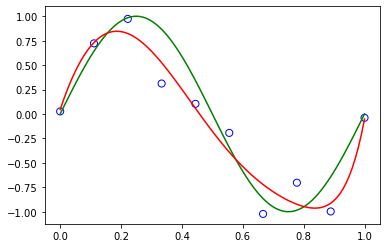

In [56]:
# Ridge Regression

ridge = LinearRegression(9)
ridge.ridge_fit(x_train, y_train, 1e-5)

y_pred_r = ridge.predict(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.plot(x_test, y_pred_r, c="r")
plt.show()

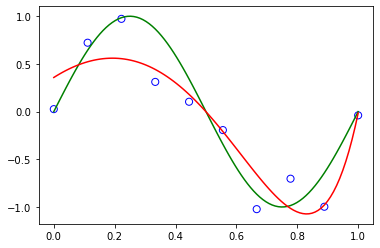

In [57]:
# Lasso Regression

lasso = LinearRegression(9)
lasso.lasso_fit(x_train, y_train, 1e-5, 0.1, 10000)

y_pred_r = lasso.predict(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.plot(x_test, y_pred_r, c="r")
plt.show()